# [실습4] 금속분말 생성공정 최적화를 위한 비선형회귀 기법


---

## 실습 목표
---
- 다항회귀 분석을 수행해봅니다.
- MLP 모델을 구현해봅니다.
- 다양한 학습률을 비교해봅니다.
- 다양한 최적화 함수를 비교해봅니다.
- 금속분말 데이터를 MLP 모델에 적용해봅니다.

## 실습 목차
---
1. **다항 회귀 분석 수행:** 다항 회귀 분석 모델을 학습, 예측, 평가해봅니다.

2. **MLP 모델의 구현:** Keras 를 이용한 MLP 구현

3. **회귀 모델 수행:** 금속분말 데이터셋을 이용하여 회귀모델 학습

## 실습 개요
---

이번 실습에서는 다항 회귀 분석을 수행해보고, 비선형 데이터를 다룰 수 있는 MLP 모델에 대해 배워봅니다.

## 1. 다항회귀 분석 수행
---
다항 회귀 분석 모델을 구현해보고, 성능을 비교해봅니다.


### 1.1 라이브러리 불러오기

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from tensorflow.keras.layers import Dense, Input

2025-02-11 04:00:21.389257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-11 04:00:21.488506: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 04:00:21.517289: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 04:00:23.751513: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

### 1.2 데이터 생성

In [2]:
np.random.seed(0)
X = np.random.normal(size = (1000, 1)) 
y = X ** 3 * 3 + X ** 2 * 2 + X - 2 + np.random.normal(size = (1000, 1)) * 3

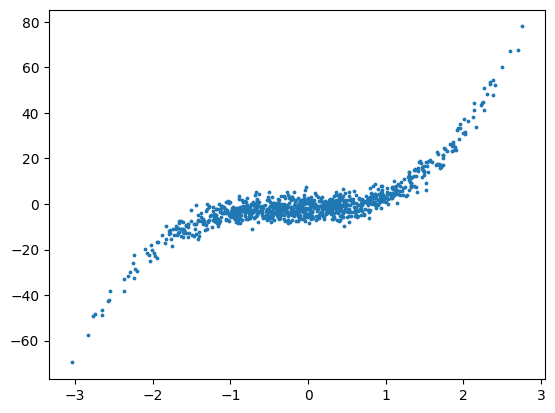

In [3]:
plt.scatter(X, y, s = 3)
plt.show()

### 1.3 데이터 분할

In [4]:
train_ratio = 0.8
train_X = X[:int(len(X) * train_ratio)].reshape(-1, 1)
train_y = y[:int(len(X) * train_ratio)].reshape(-1, 1)
test_X = X[int(len(X) * train_ratio):].reshape(-1, 1)
test_y = y[int(len(X) * train_ratio):].reshape(-1, 1)

### 1.4 선형 회귀 모델

### 1.4.1 최소제곱 선형 회귀 모델 학습

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
fitter = LinearRegression()
fitter

LinearRegression()

In [7]:
fitter.fit(train_X, train_y)

LinearRegression()

### 1.4.2 최소제곱 선형 회귀 모델 예측

In [8]:
pred = fitter.predict(test_X)

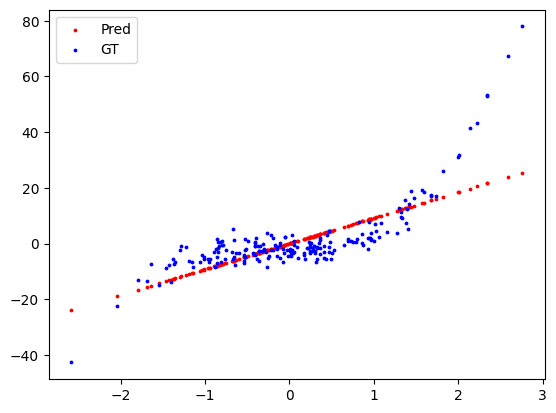

In [9]:
plt.scatter(test_X, pred, s = 3, c = 'red', label = 'Pred')
plt.scatter(test_X, test_y, s = 3, c = 'blue', label = 'GT')
plt.legend()
plt.show()

### 1.4.3 최소제곱 선형 회귀 모델 평가

In [10]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.584614


### 1.5 다항 회귀 모델

### 1.5.1 데이터 전처리

In [11]:
train_Xs = np.concatenate([train_X ** 3, train_X ** 2, train_X], axis=1)
test_Xs = np.concatenate([test_X ** 3, test_X ** 2, test_X], axis=1)

### 1.5.2 최소제곱 선형 회귀 모델 학습

**[TODO] 최소제곱 선형회귀 모델을 정의해봅니다.**

In [12]:
fitter = LinearRegression()
fitter

LinearRegression()

**[TODO] 최소제곱 선형회귀 모델을 학습해봅니다.**

In [13]:
fitter.fit(train_Xs, train_y)

LinearRegression()

### 1.5.3 최소제곱 선형 회귀 모델 예측

**[TODO] 최소제곱 선형회귀 모델의 예측 결과를 확인해봅니다.**

In [14]:
pred = fitter.predict(test_Xs)

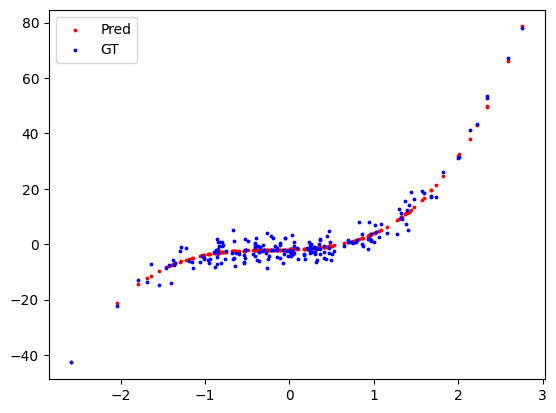

In [15]:
plt.scatter(test_X, pred, s = 3, c = 'red', label = 'Pred')
plt.scatter(test_X, test_y, s = 3, c = 'blue', label = 'GT')
plt.legend()
plt.show()

### 1.5.4 최소제곱 선형 회귀 모델 평가

In [16]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.949834


### 1.6 다항 피쳐 선택에 따른 모델 성능 비교

2제곱에서 24제곱까지의 다항 피쳐를 사용하였을 때 성능을 비교해보겠습니다.

In [17]:
degrees = np.arange(2, 25)
print(degrees)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [18]:
r2s = []
for degree in degrees:
    train_Xs = np.concatenate([train_X ** i for i in range(degree + 1)], axis=1)
    test_Xs = np.concatenate([test_X ** i for i in range(degree + 1)], axis=1)
    fitter = LinearRegression()
    fitter.fit(train_Xs, train_y)
    pred = fitter.predict(test_Xs)
    r2 = sklearn.metrics.r2_score(test_y, pred)
    print("Degree: %d -> R2 score: %f"%(degree, r2))
    r2s.append(r2)

Degree: 2 -> R2 score: 0.652474
Degree: 3 -> R2 score: 0.949834
Degree: 4 -> R2 score: 0.949863
Degree: 5 -> R2 score: 0.949525
Degree: 6 -> R2 score: 0.948715
Degree: 7 -> R2 score: 0.948016
Degree: 8 -> R2 score: 0.948088
Degree: 9 -> R2 score: 0.948196
Degree: 10 -> R2 score: 0.947491
Degree: 11 -> R2 score: 0.946404
Degree: 12 -> R2 score: 0.945894
Degree: 13 -> R2 score: 0.948829
Degree: 14 -> R2 score: 0.948599
Degree: 15 -> R2 score: 0.937195
Degree: 16 -> R2 score: 0.922179
Degree: 17 -> R2 score: 0.922574
Degree: 18 -> R2 score: 0.883105
Degree: 19 -> R2 score: 0.735307
Degree: 20 -> R2 score: 0.937408
Degree: 21 -> R2 score: 0.935197
Degree: 22 -> R2 score: -0.652393
Degree: 23 -> R2 score: -0.352344
Degree: 24 -> R2 score: -4.219461


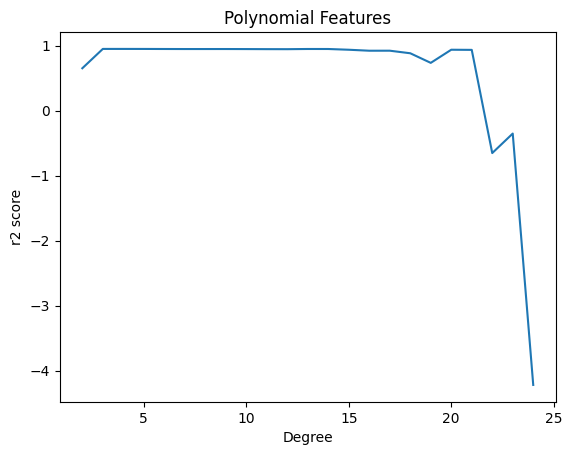

In [19]:
plt.plot(degrees, r2s)
plt.title('Polynomial Features')
plt.xlabel('Degree')
plt.ylabel('r2 score')
plt.show()

피쳐를 과도하게 많이 사용하면 오히려 모델의 성능이 떨어지는 것을 확인할 수 있습니다. 적절한 degree를 찾아 설정해주는 것이 중요하겠습니다.

## 2. MLP 모델의 구현
---
다음으로, 비선형 데이터를 잘 다룰 수 있는 다층 퍼셉트론 모델 (Multi-layer perceptron; MLP) 을 구현해보겠습니다.

### 2.1 라이브러리 불러오기

In [20]:
import tensorflow as tf

### 2.2 비선형 데이터 생성

In [21]:
np.random.seed(0)
X = np.random.normal(size = (1000, 1)) 
y = np.e ** X + np.random.normal(size = (1000, 1)) * 1

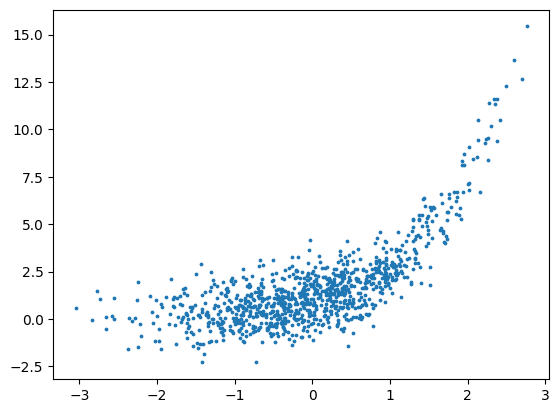

In [22]:
plt.scatter(X, y, s = 3)
plt.show()

### 2.3 데이터 분할

**[TODO] 학습데이터와 테스트 데이터를 분할해줍니다. 처음 80%의 데이터는 학습용으로, 나머지는 테스트용으로 사용합니다.**

In [23]:
train_ratio = 0.8
train_X = X[:int(len(X)*train_ratio)].reshape(-1, 1)
train_y = y[:int(len(X)*train_ratio)].reshape(-1, 1)
test_X = X[int(len(X)*train_ratio):].reshape(-1, 1)
test_y = y[int(len(X)*train_ratio):].reshape(-1, 1)

### 2.4 MLP 모델 설정

In [24]:
MLP_model = tf.keras.Sequential([
    Input(shape=(train_X.shape[1],)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

2025-02-11 04:00:30.553588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-02-11 04:00:30.553631: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-02-11 04:00:30.553660: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (8bc5c089a690): /proc/driver/nvidia/version does not exist
2025-02-11 04:00:30.554168: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2.5 학습 방법 설정

In [25]:
MLP_model.compile(loss = 'mse',
              optimizer = 'adam',
)

### 2.6 모델 학습

In [26]:
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 1s - loss: 3.6660 - 566ms/epoch - 11ms/step
Epoch 2/10
50/50 - 0s - loss: 1.4770 - 70ms/epoch - 1ms/step
Epoch 3/10
50/50 - 0s - loss: 1.3047 - 74ms/epoch - 1ms/step
Epoch 4/10
50/50 - 0s - loss: 1.2728 - 76ms/epoch - 2ms/step
Epoch 5/10
50/50 - 0s - loss: 1.2441 - 73ms/epoch - 1ms/step
Epoch 6/10
50/50 - 0s - loss: 1.2207 - 74ms/epoch - 1ms/step
Epoch 7/10
50/50 - 0s - loss: 1.1965 - 83ms/epoch - 2ms/step
Epoch 8/10
50/50 - 0s - loss: 1.1607 - 81ms/epoch - 2ms/step
Epoch 9/10
50/50 - 0s - loss: 1.1319 - 80ms/epoch - 2ms/step
Epoch 10/10
50/50 - 0s - loss: 1.1092 - 76ms/epoch - 2ms/step


### 2.7 모델 예측

In [27]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 2ms/step


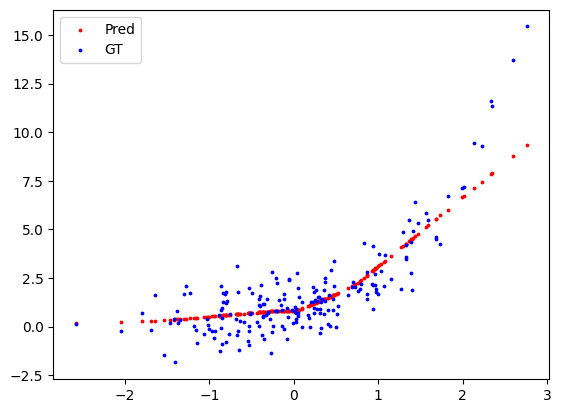

In [28]:
plt.scatter(test_X, pred, s = 3, c = 'red', label = 'Pred')
plt.scatter(test_X, test_y, s = 3, c = 'blue', label = 'GT')
plt.legend()
plt.show()

### 2.8 모델 평가

In [29]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.765769


이론적으로 R2-score 는 선형 회귀의 설명력에 대한 지표이기 때문에 비선형 회귀에 적용할 수 없습니다. 그러나, 여기서는 통계학적으로 깊이 들어가지는 않을 것이기 때문에 편의를 위해 R2-score를 사용하겠습니다.

### 2.9 학습률 조정해보기

### 2.9.1 학습률이 너무 클 때

**[TODO] 이번에는 MLP 모델을 직접 정의해봅니다.**

In [30]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

**[TODO] 정의한 MLP 모델을 컴파일해봅니다.**

In [31]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.3),
)

**[TODO] 정의한 MLP 모델을 학습해봅니다.**

In [32]:
history_toobig = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 4.9264 - 366ms/epoch - 7ms/step
Epoch 2/10
50/50 - 0s - loss: 4.1938 - 71ms/epoch - 1ms/step
Epoch 3/10
50/50 - 0s - loss: 4.0856 - 77ms/epoch - 2ms/step
Epoch 4/10
50/50 - 0s - loss: 4.0572 - 71ms/epoch - 1ms/step
Epoch 5/10
50/50 - 0s - loss: 4.1760 - 73ms/epoch - 1ms/step
Epoch 6/10
50/50 - 0s - loss: 4.0241 - 68ms/epoch - 1ms/step
Epoch 7/10
50/50 - 0s - loss: 4.1050 - 74ms/epoch - 1ms/step
Epoch 8/10
50/50 - 0s - loss: 4.1222 - 68ms/epoch - 1ms/step
Epoch 9/10
50/50 - 0s - loss: 4.0004 - 74ms/epoch - 1ms/step
Epoch 10/10
50/50 - 0s - loss: 4.0987 - 64ms/epoch - 1ms/step


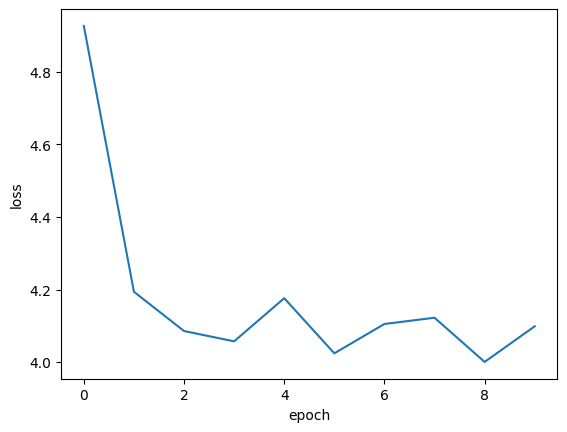

In [33]:
plt.plot(history_toobig.epoch, history_toobig.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**[TODO] 정의한 MLP 모델의 예측 결과를 확인해봅니다.**

In [34]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 2ms/step


In [35]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: -0.038238


### 2.9.2 학습률이 적당할 때

**[TODO] MLP 모델을 정의해봅니다.**

In [36]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'), # 첫번째 레이어의 출력 차원은 64입니다. 활성함수는 ReLU로 합니다.
    tf.keras.layers.Dense(32, activation='relu'), # 두번쨰 레이어의 출력 차원은 32입니다. 활성함수는 ReLU로 합니다.
    tf.keras.layers.Dense(1)
])

**[TODO] 정의한 MLP 모델을 컴파일해봅니다. 최적화방법은 SGD를 사용하며, 학습률은 0.01으로 합니다.**

In [37]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
)

**[TODO] 정의한 MLP 모델을 학습해봅니다.**

In [38]:
history_good = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 2.9717 - 356ms/epoch - 7ms/step
Epoch 2/10
50/50 - 0s - loss: 1.3828 - 65ms/epoch - 1ms/step
Epoch 3/10
50/50 - 0s - loss: 1.3142 - 75ms/epoch - 1ms/step
Epoch 4/10
50/50 - 0s - loss: 1.2399 - 66ms/epoch - 1ms/step
Epoch 5/10
50/50 - 0s - loss: 1.2014 - 64ms/epoch - 1ms/step
Epoch 6/10
50/50 - 0s - loss: 1.1714 - 70ms/epoch - 1ms/step
Epoch 7/10
50/50 - 0s - loss: 1.1368 - 68ms/epoch - 1ms/step
Epoch 8/10
50/50 - 0s - loss: 1.1000 - 79ms/epoch - 2ms/step
Epoch 9/10
50/50 - 0s - loss: 1.0839 - 69ms/epoch - 1ms/step
Epoch 10/10
50/50 - 0s - loss: 1.0521 - 61ms/epoch - 1ms/step


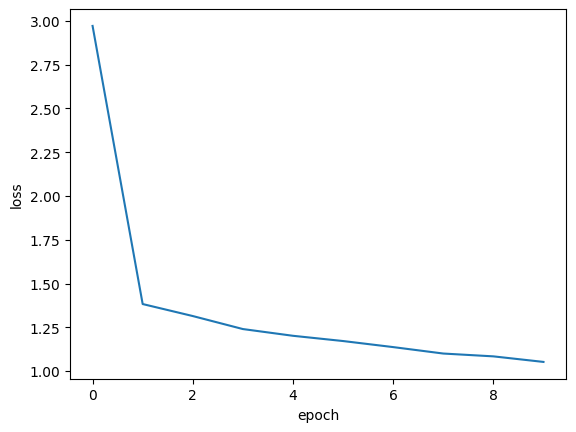

In [39]:
plt.plot(history_good.epoch, history_good.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**[TODO] 정의한 MLP 모델의 예측 결과를 확인해봅니다.**

In [40]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 2ms/step


In [41]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.797032


### 2.9.3 학습률이 너무 낮을 때

**[TODO] MLP 모델을 정의해봅니다.**

In [42]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation ='relu'), # 첫번째 레이어의 출력 차원은 64입니다. 활성함수는 ReLU로 합니다.
    tf.keras.layers.Dense(32, activation = 'relu'), # 두번쨰 레이어의 출력 차원은 32입니다. 활성함수는 ReLU로 합니다.
    tf.keras.layers.Dense(1)
])

**[TODO] 정의한 MLP 모델을 컴파일해봅니다. 최적화 방법은 SGD를 사용하며, 학습률은 0.0001으로 합니다.**

In [43]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001),
)

**[TODO] 정의한 MLP 모델을 학습해봅니다.**

In [44]:
history_toolow = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 5.9980 - 342ms/epoch - 7ms/step
Epoch 2/10
50/50 - 0s - loss: 5.8109 - 73ms/epoch - 1ms/step
Epoch 3/10
50/50 - 0s - loss: 5.6370 - 78ms/epoch - 2ms/step
Epoch 4/10
50/50 - 0s - loss: 5.4727 - 66ms/epoch - 1ms/step
Epoch 5/10
50/50 - 0s - loss: 5.3187 - 67ms/epoch - 1ms/step
Epoch 6/10
50/50 - 0s - loss: 5.1732 - 70ms/epoch - 1ms/step
Epoch 7/10
50/50 - 0s - loss: 5.0350 - 67ms/epoch - 1ms/step
Epoch 8/10
50/50 - 0s - loss: 4.9023 - 66ms/epoch - 1ms/step
Epoch 9/10
50/50 - 0s - loss: 4.7746 - 67ms/epoch - 1ms/step
Epoch 10/10
50/50 - 0s - loss: 4.6516 - 67ms/epoch - 1ms/step


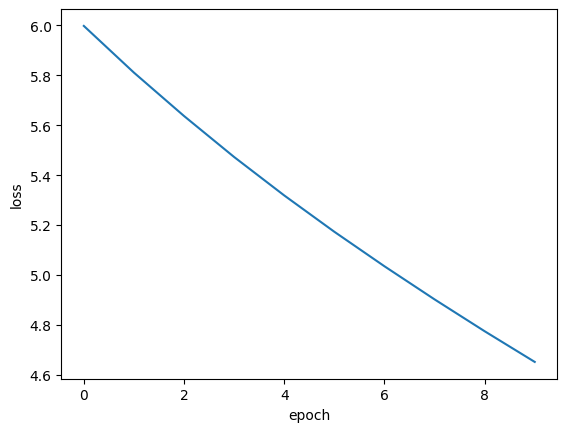

In [45]:
plt.plot(history_toolow.epoch, history_toolow.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**[TODO] 정의한 MLP 모델의 예측결과를 확인해봅니다.**

In [46]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 2ms/step


In [47]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: -0.119826


### 2.9.4 학습률에 따른 loss 변화 그래프

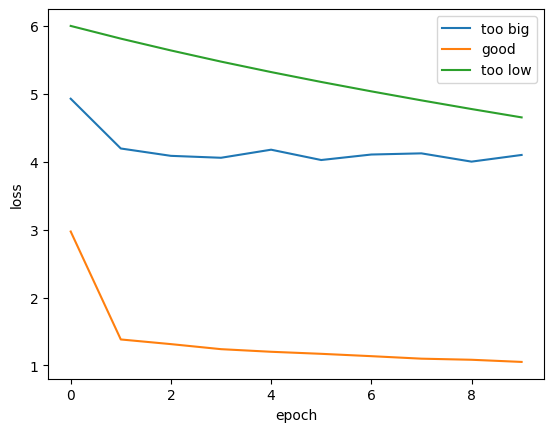

In [48]:
plt.plot(history_toobig.epoch, history_toobig.history['loss'], label = 'too big')
plt.plot(history_good.epoch, history_good.history['loss'], label = 'good')
plt.plot(history_toolow.epoch, history_toolow.history['loss'], label = 'too low')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

### 2.10 최적화 방법 (Optimizer) 조정해보기

### 2.10.1 Stochastic Gradient Descent

**[TODO] MLP 모델을 정의하고, 컴파일하고, 학습 및 예측해봅니다.**

In [49]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [50]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
)

In [51]:
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 3.1091 - 339ms/epoch - 7ms/step
Epoch 2/10
50/50 - 0s - loss: 1.4260 - 63ms/epoch - 1ms/step
Epoch 3/10
50/50 - 0s - loss: 1.3027 - 65ms/epoch - 1ms/step
Epoch 4/10
50/50 - 0s - loss: 1.2413 - 61ms/epoch - 1ms/step
Epoch 5/10
50/50 - 0s - loss: 1.1959 - 67ms/epoch - 1ms/step
Epoch 6/10
50/50 - 0s - loss: 1.1547 - 64ms/epoch - 1ms/step
Epoch 7/10
50/50 - 0s - loss: 1.1191 - 68ms/epoch - 1ms/step
Epoch 8/10
50/50 - 0s - loss: 1.0801 - 65ms/epoch - 1ms/step
Epoch 9/10
50/50 - 0s - loss: 1.0596 - 68ms/epoch - 1ms/step
Epoch 10/10
50/50 - 0s - loss: 1.0361 - 64ms/epoch - 1ms/step


In [52]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 2ms/step


In [53]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.800912


### 2.10.2 Adagrad

**[TODO] MLP 모델을 정의하고, 컴파일하고, 학습 및 예측해봅니다.**

In [54]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [55]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.Adagrad(),
)

In [56]:
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 5.8930 - 386ms/epoch - 8ms/step
Epoch 2/10
50/50 - 0s - loss: 5.3587 - 62ms/epoch - 1ms/step
Epoch 3/10
50/50 - 0s - loss: 5.0170 - 64ms/epoch - 1ms/step
Epoch 4/10
50/50 - 0s - loss: 4.7337 - 56ms/epoch - 1ms/step
Epoch 5/10
50/50 - 0s - loss: 4.4909 - 58ms/epoch - 1ms/step
Epoch 6/10
50/50 - 0s - loss: 4.2741 - 64ms/epoch - 1ms/step
Epoch 7/10
50/50 - 0s - loss: 4.0762 - 58ms/epoch - 1ms/step
Epoch 8/10
50/50 - 0s - loss: 3.8926 - 66ms/epoch - 1ms/step
Epoch 9/10
50/50 - 0s - loss: 3.7153 - 75ms/epoch - 2ms/step
Epoch 10/10
50/50 - 0s - loss: 3.5154 - 64ms/epoch - 1ms/step


In [57]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 2ms/step


In [58]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.149820


### 2.10.3 Adam

**[TODO] MLP 모델을 정의하고, 컴파일하고, 학습 및 예측해봅니다.**

In [59]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [60]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.Adam(),
)

In [61]:
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 3.7529 - 364ms/epoch - 7ms/step
Epoch 2/10
50/50 - 0s - loss: 1.5576 - 54ms/epoch - 1ms/step
Epoch 3/10
50/50 - 0s - loss: 1.3228 - 53ms/epoch - 1ms/step
Epoch 4/10
50/50 - 0s - loss: 1.2923 - 58ms/epoch - 1ms/step
Epoch 5/10
50/50 - 0s - loss: 1.2563 - 61ms/epoch - 1ms/step
Epoch 6/10
50/50 - 0s - loss: 1.2345 - 62ms/epoch - 1ms/step
Epoch 7/10
50/50 - 0s - loss: 1.2027 - 68ms/epoch - 1ms/step
Epoch 8/10
50/50 - 0s - loss: 1.1747 - 79ms/epoch - 2ms/step
Epoch 9/10
50/50 - 0s - loss: 1.1524 - 79ms/epoch - 2ms/step
Epoch 10/10
50/50 - 0s - loss: 1.1195 - 71ms/epoch - 1ms/step


In [62]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 2ms/step


In [63]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.763553


실험 결과 SGD 가 가장 높은 성능을 보였으며, Adagrad가 가장 낮은 성능을 보였습니다. 그러나, 데이터에 따라 최적화 방법의 성능은 달라질 수 있으며, 설정 가능한 parameter를 어떻게 설정하는지 역시 중요합니다.

## 3. 회귀 모델 수행
---
다음으로, 금속분말 데이터를 이용하여 MLP 를 학습해보겠습니다.

### 3.1 라이브러리 불러오기

In [64]:
import numpy as np
import json

### 3.2 학습용, 검증용, 테스트용 데이터 읽어오기

In [65]:
stage1 = {
    'train_X': np.load('./Data/train_data_stage1_X.npy'),
    'train_y': np.load('./Data/train_data_stage1_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage1_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage1_y.npy'),
    'test_X': np.load('./Data/test_data_stage1_X.npy'),
    'test_y': np.load('./Data/test_data_stage1_y.npy'),
}

stage2 = {
    'train_X': np.load('./Data/train_data_stage2_X.npy'),
    'train_y': np.load('./Data/train_data_stage2_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage2_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage2_y.npy'),
    'test_X': np.load('./Data/test_data_stage2_X.npy'),
    'test_y': np.load('./Data/test_data_stage2_y.npy'),
}

columns = json.load(open('./Data/valid_columns.json', 'r'))

### 3.3 데이터 표준화하기

### 3.3.1 Stage1 데이터 표준화하기

In [66]:
stage1_X_mean = stage1['train_X'].mean(axis = 0)
stage1_y_mean = stage1['train_y'].mean(axis = 0)
print('입력값 평균:', stage1_X_mean)
print('출력값 평균:', stage1_y_mean)

입력값 평균: [  11.85294587  205.74478705  951.00255435 1242.437388     72.01273285
   72.01162996   70.34571071   11.07603585  408.95062376   81.47648118
   75.96962985   12.79330524  566.38390195  202.65058918   68.99620414
   69.10054828   73.3958155    13.89662164  226.12474952   76.81680896
   59.99898793    9.08815439  205.71384206  425.06943434  202.26546402
   78.00841235   78.00453278  345.11532917   13.26721071  246.73680272
   74.14375402   65.00868711  108.96768422   84.98831262   80.00354672
   15.32405834   23.84402174]
출력값 평균: [12.89768652 13.69662267  8.00480187 11.36113325 21.31940678 32.87843839
  0.12721732  1.34725458  1.09990652 19.8051213   7.68305334  1.4919701
  1.20588607  2.89104562 10.02515553]


In [67]:
stage1_X_std = stage1['train_X'].std(axis = 0)
stage1_y_std = stage1['train_y'].std(axis = 0)
print('입력값 표준편차:', stage1_X_std)
print('출력값 표준편차:', stage1_y_std)

입력값 표준편차: [5.10993143e-01 1.16806618e+01 1.27620111e+02 9.77321235e+01
 6.23396785e-02 4.06238919e-01 5.49867530e+00 6.36170724e-01
 2.05368437e+01 9.21642493e-01 2.06429784e+00 1.07360805e-01
 1.83380514e+01 1.48381842e+01 5.44970706e-02 1.06721153e-01
 3.94100055e-01 2.91335938e-02 3.06908107e+00 8.30358591e-01
 1.61971729e-01 3.95092636e-01 1.63223059e+01 9.53699574e+00
 1.58921785e+01 7.73526529e-02 1.14547773e-01 9.05396328e+00
 4.34061012e-01 6.10492128e+00 2.05042127e+00 6.27961350e-02
 5.59761035e+00 1.85637963e+01 1.18126539e-01 1.18770739e+00
 3.72221796e-01]
출력값 표준편차: [0.9270819  0.85503751 6.90580271 1.03664992 2.14313701 3.882343
 0.57606676 1.13060617 1.41265541 4.68687927 1.07824517 2.54294205
 0.66114934 0.92884134 7.38778856]


In [68]:
# 학습 데이터 표준화
stage1['train_X'] = (stage1['train_X'] - stage1_X_mean) / stage1_X_std
stage1['train_y'] = (stage1['train_y'] - stage1_y_mean) / stage1_y_std
# 검증용 데이터 표준화
stage1['valid_X'] = (stage1['valid_X'] - stage1_X_mean) / stage1_X_std
stage1['valid_y'] = (stage1['valid_y'] - stage1_y_mean) / stage1_y_std
# 테스트 데이터 표준화
stage1['test_X'] = (stage1['test_X'] - stage1_X_mean) / stage1_X_std
stage1['test_y'] = (stage1['test_y'] - stage1_y_mean) / stage1_y_std

### 3.3.2 Stage2 데이터 표준화하기

**[TODO] Stage2의 학습데이터의 칼럼별 평균과 표준편차를 계산하세요.**

In [69]:
stage2_X_mean = stage2['train_X'].mean(axis = 0)
stage2_y_mean = stage2['train_y'].mean(axis = 0)
print('입력값 평균:', stage2_X_mean)
print('출력값 평균:', stage2_y_mean)

입력값 평균: [1.28976865e+01 1.36966227e+01 8.00480187e+00 1.13611333e+01
 2.13194068e+01 3.28784384e+01 1.27217323e-01 1.34725458e+00
 1.09990652e+00 1.98051213e+01 7.68305334e+00 1.49197010e+00
 1.20588607e+00 2.89104562e+00 1.00251555e+01 3.60122933e+02
 3.60136275e+02 1.72294333e+01 3.22627969e+02 3.09786854e+02
 1.87200947e+02 3.09998282e+02 2.89997582e+02 2.69681649e+02
 2.42661246e+02 2.44994629e+02 6.34195390e+01 1.54046742e+02
 1.53240583e+01 2.38440217e+01]
출력값 평균: [11.69212911  6.25614828 10.2499656  19.33555126  2.87697932  2.7475277
  0.53310706  2.91750962 18.38898671 11.61424043  7.53420311  3.54181714
  7.51699723]


In [70]:
stage2_X_std = stage2['train_X'].std(axis = 0)
stage2_y_std = stage2['train_y'].std(axis = 0)
print('입력값 표준편차:', stage2_X_std)
print('출력값 표준편차:', stage2_y_std)

입력값 표준편차: [ 0.9270819   0.85503751  6.90580271  1.03664992  2.14313701  3.882343
  0.57606676  1.13060617  1.41265541  4.68687927  1.07824517  2.54294205
  0.66114934  0.92884134  7.38778856  1.9209727   2.64895901  0.94209921
  3.61537985  2.74078134 23.41676809  0.03961971  0.05202987  1.01853204
  1.59098238  0.10771334  0.39587306  9.90869048  1.18770739  0.3722218 ]
출력값 표준편차: [3.62230517 1.60057596 2.30753588 4.62537631 9.09270122 0.37574164
 0.20467783 0.49744294 4.97294003 7.62127826 1.64901449 0.45450424
 2.0723342 ]


**[TODO] 계산한 평균과 표준편차를 이용하여 stage2의 데이터를 표준화해보세요.**

In [71]:
# 학습 데이터 표준화
stage2['train_X'] = (stage2['train_X'] - stage2_X_mean) / stage2_X_std
stage2['train_y'] = (stage2['train_y'] - stage2_y_mean) / stage2_y_std

# 검증용 데이터 표준화
stage2['valid_X'] = (stage2['valid_X'] - stage2_X_mean) / stage2_X_std
stage2['valid_y'] = (stage2['valid_y'] - stage2_y_mean) / stage2_y_std


# 테스트 데이터 표준화
stage2['test_X'] = (stage2['test_X'] - stage2_X_mean) / stage2_X_std
stage2['test_y'] = (stage2['test_y'] - stage2_y_mean) / stage2_y_std


### 3.4 MLP 회귀 모델 수행 (Stage1)

### 3.4.1 모델 정의

In [72]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape = stage1['train_X'].shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(stage1['train_y'].shape[1])
])

### 3.4.2 모델 학습 방법 설정

In [73]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
)

### 3.4.3 모델 학습

In [74]:
history = MLP_model.fit(stage1['train_X'], stage1['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.9189 - 1s/epoch - 2ms/step
Epoch 2/50
564/564 - 1s - loss: 0.7837 - 814ms/epoch - 1ms/step
Epoch 3/50
564/564 - 1s - loss: 0.7528 - 816ms/epoch - 1ms/step
Epoch 4/50
564/564 - 1s - loss: 0.7343 - 793ms/epoch - 1ms/step
Epoch 5/50
564/564 - 1s - loss: 0.7201 - 771ms/epoch - 1ms/step
Epoch 6/50
564/564 - 1s - loss: 0.7077 - 658ms/epoch - 1ms/step
Epoch 7/50
564/564 - 1s - loss: 0.6967 - 626ms/epoch - 1ms/step
Epoch 8/50
564/564 - 1s - loss: 0.6862 - 597ms/epoch - 1ms/step
Epoch 9/50
564/564 - 1s - loss: 0.6760 - 620ms/epoch - 1ms/step
Epoch 10/50
564/564 - 1s - loss: 0.6658 - 628ms/epoch - 1ms/step
Epoch 11/50
564/564 - 1s - loss: 0.6569 - 651ms/epoch - 1ms/step
Epoch 12/50
564/564 - 1s - loss: 0.6480 - 662ms/epoch - 1ms/step
Epoch 13/50
564/564 - 1s - loss: 0.6391 - 716ms/epoch - 1ms/step
Epoch 14/50
564/564 - 1s - loss: 0.6311 - 738ms/epoch - 1ms/step
Epoch 15/50
564/564 - 1s - loss: 0.6240 - 819ms/epoch - 1ms/step
Epoch 16/50
564/564 - 1s - loss: 0.61

### 3.4.4 모델 예측

In [75]:
pred = MLP_model.predict(stage1['test_X'])

36/36 [==============================] - 0s 920us/step


### 3.4.5 모델 평가

In [76]:
r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.541549


### 3.4 MLP 회귀 모델 수행 (Stage2)

**[TODO] 각 셀의 주석 대로 Stage2 데이터에 대한 MLP 모델을 완성해보세요.**

### 3.4.1 모델 정의

In [77]:
# MLP 모델을 설정합니다. MLP 모델의 내부 구성은 Stage1과 동일하게 합니다.
MLP_model = tf.keras.Sequential([
    Input(shape = stage2['train_X'].shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'), # 활성함수는 relu로 설정해주세요.
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(stage2['train_y'].shape[1])
])

### 3.4.2 모델 학습 방법 설정

In [78]:
# MLP 모델을 컴파일합니다. 학습 방법은 Stage1과 동일하게 합니다.
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
)

### 3.4.3 모델 학습

In [79]:
# MLP 모델을 학습합니다. 50에폭 동안 배치사이즌 16으로 학습합니다.
history = MLP_model.fit(stage2['train_X'], stage2['train_y'], epochs = 50, batch_size= 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.7455 - 848ms/epoch - 2ms/step
Epoch 2/50
564/564 - 1s - loss: 0.5431 - 551ms/epoch - 978us/step
Epoch 3/50
564/564 - 1s - loss: 0.4958 - 570ms/epoch - 1ms/step
Epoch 4/50
564/564 - 1s - loss: 0.4739 - 564ms/epoch - 1ms/step
Epoch 5/50
564/564 - 1s - loss: 0.4628 - 591ms/epoch - 1ms/step
Epoch 6/50
564/564 - 1s - loss: 0.4549 - 584ms/epoch - 1ms/step
Epoch 7/50
564/564 - 1s - loss: 0.4486 - 552ms/epoch - 979us/step
Epoch 8/50
564/564 - 1s - loss: 0.4430 - 556ms/epoch - 985us/step
Epoch 9/50
564/564 - 1s - loss: 0.4373 - 565ms/epoch - 1ms/step
Epoch 10/50
564/564 - 1s - loss: 0.4324 - 602ms/epoch - 1ms/step
Epoch 11/50
564/564 - 1s - loss: 0.4279 - 641ms/epoch - 1ms/step
Epoch 12/50
564/564 - 1s - loss: 0.4234 - 733ms/epoch - 1ms/step
Epoch 13/50
564/564 - 1s - loss: 0.4187 - 563ms/epoch - 999us/step
Epoch 14/50
564/564 - 1s - loss: 0.4142 - 559ms/epoch - 991us/step
Epoch 15/50
564/564 - 1s - loss: 0.4100 - 565ms/epoch - 1ms/step
Epoch 16/50
564/564 - 1s

### 3.4.4 모델 예측

In [80]:
# 학습된 MLP 모델을 테스트 데이터에 대해 예측합니다.
pred = MLP_model.predict(stage2['test_X'])

36/36 [==============================] - 0s 2ms/step


### 3.4.5 모델 평가

In [81]:
# 예측된 결과의 R2 score를 출력합니다.
r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.659463


<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>